## Venues Data Analysis of Paris and nearby Suburbs


In [33]:
import pandas as pd
import numpy as np
import requests
import folium
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

we will import data from 
https://data.iledefrance.fr/explore/dataset/base-comparateur-de-territoires/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B
this dataset included the department code, city code, GPS info, househould income information and etc. we will select only paris (department code 75) and its nearby suburbs(department code is 92, 93, 94)


In [34]:
idf_url = "https://data.iledefrance.fr/explore/dataset/base-comparateur-de-territoires/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B"
idf_df = pd.read_csv(idf_url, delimiter=";")
idf_df.shape
idf_df.columns

Index(['CODGEO', 'LIBGEO', 'REG', 'DEP', 'P16_POP', 'P11_POP', 'SUPERF',
       'NAIS1116', 'DECE1116', 'P16_MEN', 'NAISD18', 'DECESD18', 'P16_LOG',
       'P16_RP', 'P16_RSECOCC', 'P16_LOGVAC', 'P16_RP_PROP', 'NBMENFISC16',
       'PIMP16', 'MED16', 'TP6016', 'P16_EMPLT', 'P16_EMPLT_SAL', 'P11_EMPLT',
       'P16_POP1564', 'P16_CHOM1564', 'P16_ACT1564', 'ETTOT15', 'ETAZ15',
       'ETBE15', 'ETFZ15', 'ETGU15', 'ETGZ15', 'ETOQ15', 'ETTEF115',
       'ETTEFP1015', 'Geo Shape', 'geo_point_2d'],
      dtype='object')

we will select the data(for data in DEP code 75, 92-94), and keep only column CODGEO, LIBGEO, DEP, SUPERF,MED16, GEO SHAPE, geo_point_2d

In [35]:
idf_df.rename(columns={'Geo Shape':'Geo_Shape'}, inplace=True)
columns = ["CODGEO", "LIBGEO", "DEP","SUPERF","MED16","Geo_Shape","geo_point_2d"]
paris_df = idf_df.loc[idf_df["DEP"].isin([75,92,93,94])]
paris_df = paris_df[columns].sort_values(by=['DEP','CODGEO'])
paris_df = paris_df.reset_index(drop=True)
paris_df

CODGEO                    LIBGEO  DEP  SUPERF         MED16  \
0     75101  Paris 1er Arrondissement   75    1.83  32697.333333   
1     75102   Paris 2e Arrondissement   75    0.99  30566.500000   
2     75103   Paris 3e Arrondissement   75    1.17  31333.000000   
3     75104   Paris 4e Arrondissement   75    1.60  31007.222222   
4     75105   Paris 5e Arrondissement   75    2.54  33169.333333   
..      ...                       ...  ...     ...           ...   
138   94077         Villeneuve-le-Roi   94    8.40  20538.666667   
139   94078  Villeneuve-Saint-Georges   94    8.75  15593.809524   
140   94079        Villiers-sur-Marne   94    4.33  21288.000000   
141   94080                 Vincennes   94    1.91  31450.666667   
142   94081           Vitry-sur-Seine   94   11.67  17943.333333   

                                             Geo_Shape  \
0    {"type": "Polygon", "coordinates": [[[2.325761...   
1    {"type": "Polygon", "coordinates": [[[2.350841...   
2    {"type": "Polygon", "coordinates": [[[2.350091...   
3    {"type": "Polygon", "coordinates": [[[2.344559...   
4    {"type": "Polygon", "coordinates": [[[2.344559...   
..                                                 ...   
138  {"type": "Polygon", "coordinates": [[[2.435128...   
139  {"type": "Polygon", "coordinates": [[[2.427522...   
140  {"type": "Polygon", "coordinates": [[[2.557404...   
141  {"type": "Polygon", "coordinates": [[[2.418968...   
142  {"type": "Polygon", "coordinates": [[[2.371166...   

                    geo_point_2d  
0    48.8625262113,2.33630086091  
1    48.8682182328,2.34268958705  
2    48.8628851439,2.35993164256  
3    48.8542874923,2.35759608216  
4    48.8444087298,2.35049826182  
..                           ...  
138  48.7321607291,2.41097949758  
139   48.742053977,2.44909554799  
140   48.8263001327,2.5453774964  
141  48.8472864946,2.43799511731  
142  48.7884475501,2.39447413132  

[143 rows x 7 columns]

save result to csv file

In [36]:
paris_df.to_csv("pd_paris_geo.csv", index=False)

### Explore Ile de France data  
box plot to check the surface of cities grouped by department

[(0.0, 30.0)]

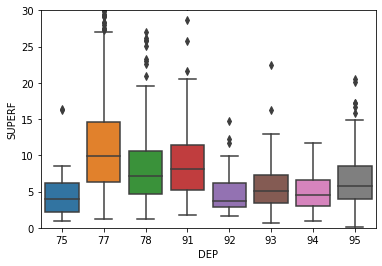

In [37]:
ax = sns.boxplot(x="DEP", y="SUPERF", data=idf_df)
ax.set(ylim=(0, 30)) # we set y range from 0 to 30, since there are some outlier have huge values

As box plot showed, the 4 deparments (75, 92-94) in the petite couronne has smaller city size than other departement(77,78, 91,95)
let check the desity of city in the ile de france this time

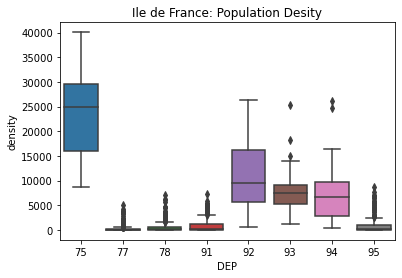

In [39]:
idf_df["density"] = idf_df["P16_POP"]/idf_df["SUPERF"]
ax = sns.boxplot(x="DEP", y="density", data=idf_df).set_title('Ile de France: Population Desity')


the above data showed that the population density in petite couronne(75, 92-94) is much higher than other 4 departments.

Now, we will check the revenu distribution, MED16 is the median value of level of live, level of live is the household revnud divise par family part

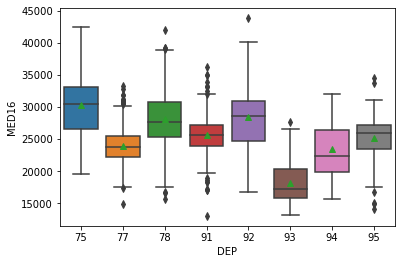

In [40]:
ax = sns.boxplot(x="DEP", y="MED16", data=idf_df, showmeans=True)

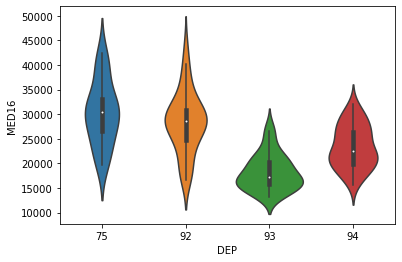

In [41]:
ax = sns.violinplot(x="DEP", y="MED16", data=paris_df)

the result show that, deparment 93 has the lowest household median revenu, and the difference between department 93 and other 3 departments. Paris has highest m

In [111]:
paris_df.head()

CODGEO                    LIBGEO  DEP  SUPERF         MED16  \
0   75101  Paris 1er Arrondissement   75    1.83  32697.333333   
1   75102   Paris 2e Arrondissement   75    0.99  30566.500000   
2   75103   Paris 3e Arrondissement   75    1.17  31333.000000   
3   75104   Paris 4e Arrondissement   75    1.60  31007.222222   
4   75105   Paris 5e Arrondissement   75    2.54  33169.333333   

                                           Geo_Shape  \
0  {"type": "Polygon", "coordinates": [[[2.325761...   
1  {"type": "Polygon", "coordinates": [[[2.350841...   
2  {"type": "Polygon", "coordinates": [[[2.350091...   
3  {"type": "Polygon", "coordinates": [[[2.344559...   
4  {"type": "Polygon", "coordinates": [[[2.344559...   

                  geo_point_2d  
0  48.8625262113,2.33630086091  
1  48.8682182328,2.34268958705  
2  48.8628851439,2.35993164256  
3  48.8542874923,2.35759608216  
4  48.8444087298,2.35049826182

We will use folim to draw a Choropleth map to see the populuation desity

In [93]:
idf_df_map = idf_df[["CODGEO", "LIBGEO","MED16","Geo_Shape","geo_point_2d", "density"]]
idf_df_map.rename(columns={'Geo_Shape':'geometry'}, inplace=True)

In [62]:
idf_geo = idf_df_map[["CODGEO", "geometry"]].to_json(orient='values')
idf_geo = json.loads(idf_geo)
#print(idf_geo)
idf_geo_dict = {}
idf_geo_dict["type"] = "FeatureCollection"
idf_geo_dict["features"] = []
for record in idf_geo:
    feature = {}
    feature["type"] = "Feature"
    feature["properties"] = dict(CODGEO=record[0])
    feature["geometry"] = json.loads(record[1])
    idf_geo_dict["features"].append(feature)
    

with open('idf_geo.json', 'w') as json_file:
    json.dump(idf_geo_dict, json_file) 


In [72]:
m = folium.Map(location=[48.866667,  2.333333], zoom_start=10)


In [73]:
idf_geo = r'idf_geo.json'
folium.Choropleth(
    geo_data=idf_geo,
    name='choropleth',
    data=idf_df_map,
    columns=['CODGEO', 'density'],
    key_on='feature.properties.CODGEO',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population Density',
    reset=True
).add_to(m)
m

the above map we can see a high density area, which is petite couronnes zone

In [89]:
m = folium.Map(location=[48.866667,  2.333333], zoom_start=9)

In [90]:
idf_geo = r'idf_geo.json'
bins = list(idf_df_map['MED16'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]))
folium.Choropleth(
    geo_data=idf_geo,
    name='choropleth',
    data=idf_df_map,
    columns=['CODGEO', 'MED16'],
    key_on='feature.properties.CODGEO',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population Density',
    bins=bins,
    reset=True
).add_to(m)
m

In [92]:
bins

[13025.7692308,
 22209.6,
 24178.547619060002,
 25856.000000019998,
 27919.678787900004,
 43848.6666667]

## use foursquare API to get the venues recommendations

In [66]:
paris_df = pd.read_csv("pd_paris_geo.csv")
paris_df[['latitude','longitude']] = paris_df.geo_point_2d.str.split(",", expand=True)
paris_df.drop("geo_point_2d", axis=1, inplace=True)
paris_df.head()

CODGEO                    LIBGEO  DEP  SUPERF         MED16  \
0   75101  Paris 1er Arrondissement   75    1.83  32697.333333   
1   75102   Paris 2e Arrondissement   75    0.99  30566.500000   
2   75103   Paris 3e Arrondissement   75    1.17  31333.000000   
3   75104   Paris 4e Arrondissement   75    1.60  31007.222222   
4   75105   Paris 5e Arrondissement   75    2.54  33169.333333   

                                           Geo_Shape       latitude  \
0  {"type": "Polygon", "coordinates": [[[2.325761...  48.8625262113   
1  {"type": "Polygon", "coordinates": [[[2.350841...  48.8682182328   
2  {"type": "Polygon", "coordinates": [[[2.350091...  48.8628851439   
3  {"type": "Polygon", "coordinates": [[[2.344559...  48.8542874923   
4  {"type": "Polygon", "coordinates": [[[2.344559...  48.8444087298   

       longitude  
0  2.33630086091  
1  2.34268958705  
2  2.35993164256  
3  2.35759608216  
4  2.35049826182

In [58]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [76]:
def getNearbyVenues(CODGEOs, latitudes, longitudes, LIMIT=100):
    
    venues_list=[]
    for CODGEO, lat, lng in zip(CODGEOs, latitudes, longitudes):
        print(CODGEO)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            CODGEO, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['CODGEO', 
                  'City_Latitude', 
                  'City_Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [77]:
paris_venues = getNearbyVenues(CODGEOs=paris_df['CODGEO'],
                                   latitudes=paris_df['latitude'],
                                   longitudes=paris_df['longitude'])

75101
75102
75103
75104
75105
75106
75107
75108
75109
75110
75111
75112
75113
75114
75115
75116
75117
75118
75119
75120
92002
92004
92007
92009
92012
92014
92019
92020
92022
92023
92024
92025
92026
92032
92033
92035
92036
92040
92044
92046
92047
92048
92049
92050
92051
92060
92062
92063
92064
92071
92072
92073
92075
92076
92077
92078
93001
93005
93006
93007
93008
93010
93013
93014
93015
93027
93029
93030
93031
93032
93033
93039
93045
93046
93047
93048
93049
93050
93051
93053
93055
93057
93059
93061
93062
93063
93064
93066
93070
93071
93072
93073
93074
93077
93078
93079
94001
94002
94003
94004
94011
94015
94016
94017
94018
94019
94021
94022
94028
94033
94034
94037
94038
94041
94042
94043
94044
94046
94047
94048
94052
94053
94054
94055
94056
94058
94059
94060
94065
94067
94068
94069
94070
94071
94073
94074
94075
94076
94077
94078
94079
94080
94081


In [78]:
print(paris_venues.shape)
paris_venues.head()

(12974, 7)


CODGEO  City_Latitude City_Longitude                               Venue  \
0   75101  48.8625262113  2.33630086091                     Musée du Louvre   
1   75101  48.8625262113  2.33630086091                        Palais Royal   
2   75101  48.8625262113  2.33630086091                   Comédie-Française   
3   75101  48.8625262113  2.33630086091  Vestige de la Forteresse du Louvre   
4   75101  48.8625262113  2.33630086091              La Clef Louvre Paris     

   Venue Latitude  Venue Longitude Venue Category  
0       48.860847         2.336440     Art Museum  
1       48.863236         2.337127  Historic Site  
2       48.863088         2.336612        Theater  
3       48.861577         2.333508  Historic Site  
4       48.863977         2.336140          Hotel

Save Paris Venus result

In [79]:
paris_venues.to_csv('paris_venues.csv', sep=';', index=False)

In [82]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['CODGEO'] = paris_venues['CODGEO'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]
paris_onehot.head()

CODGEO  Accessories Store  Afghan Restaurant  African Restaurant  Airport  \
0   75101                  0                  0                   0        0   
1   75101                  0                  0                   0        0   
2   75101                  0                  0                   0        0   
3   75101                  0                  0                   0        0   
4   75101                  0                  0                   0        0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Antique Shop  ...  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0             0  ...                              0                      0   
1             0  ...                              0                      0   
2             0  ...                              0                      0   
3             0  ...                              0                      0   
4             0  ...                              0                      0   

   Vineyard  Water Park  Wine Bar  Wine Shop  Women's Store  Yoga Studio  Zoo  \
0         0           0         0          0              0            0    0   
1         0           0         0          0              0            0    0   
2         0           0         0          0              0            0    0   
3         0           0         0          0              0            0    0   
4         0           0         0          0              0            0    0   

   Zoo Exhibit  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 331 columns]

In [83]:
paris_grouped = paris_onehot.groupby('CODGEO').mean().reset_index()
paris_grouped.head()

CODGEO  Accessories Store  Afghan Restaurant  African Restaurant  Airport  \
0   75101                0.0                0.0                0.00      0.0   
1   75102                0.0                0.0                0.00      0.0   
2   75103                0.0                0.0                0.00      0.0   
3   75104                0.0                0.0                0.01      0.0   
4   75105                0.0                0.0                0.00      0.0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0             0.0              0.0               0.0                  0.0   
1             0.0              0.0               0.0                  0.0   
2             0.0              0.0               0.0                  0.0   
3             0.0              0.0               0.0                  0.0   
4             0.0              0.0               0.0                  0.0   

   Antique Shop  ...  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0           0.0  ...                           0.00                   0.00   
1           0.0  ...                           0.00                   0.00   
2           0.0  ...                           0.01                   0.03   
3           0.0  ...                           0.00                   0.00   
4           0.0  ...                           0.00                   0.02   

   Vineyard  Water Park  Wine Bar  Wine Shop  Women's Store  Yoga Studio  \
0       0.0         0.0      0.03       0.01           0.01          0.0   
1       0.0         0.0      0.07       0.01           0.02          0.0   
2       0.0         0.0      0.05       0.02           0.00          0.0   
3       0.0         0.0      0.03       0.00           0.00          0.0   
4       0.0         0.0      0.02       0.01           0.00          0.0   

    Zoo  Zoo Exhibit  
0  0.00         0.00  
1  0.00         0.00  
2  0.00         0.00  
3  0.00         0.00  
4  0.01         0.01  

[5 rows x 331 columns]

In [86]:
paris_grouped.to_csv('paris_grouped.csv', sep=';', index=False)

Now check the top 10 venues in each cities

In [47]:
paris_grouped = pd.read_csv("paris_grouped.csv", sep=';')
paris_grouped.head()

CODGEO  Accessories Store  Afghan Restaurant  African Restaurant  Airport  \
0   75101                0.0                0.0                0.00      0.0   
1   75102                0.0                0.0                0.00      0.0   
2   75103                0.0                0.0                0.00      0.0   
3   75104                0.0                0.0                0.01      0.0   
4   75105                0.0                0.0                0.00      0.0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0             0.0              0.0               0.0                  0.0   
1             0.0              0.0               0.0                  0.0   
2             0.0              0.0               0.0                  0.0   
3             0.0              0.0               0.0                  0.0   
4             0.0              0.0               0.0                  0.0   

   Antique Shop  ...  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0           0.0  ...                           0.00                   0.00   
1           0.0  ...                           0.00                   0.00   
2           0.0  ...                           0.01                   0.03   
3           0.0  ...                           0.00                   0.00   
4           0.0  ...                           0.00                   0.02   

   Vineyard  Water Park  Wine Bar  Wine Shop  Women's Store  Yoga Studio  \
0       0.0         0.0      0.03       0.01           0.01          0.0   
1       0.0         0.0      0.07       0.01           0.02          0.0   
2       0.0         0.0      0.05       0.02           0.00          0.0   
3       0.0         0.0      0.03       0.00           0.00          0.0   
4       0.0         0.0      0.02       0.01           0.00          0.0   

    Zoo  Zoo Exhibit  
0  0.00         0.00  
1  0.00         0.00  
2  0.00         0.00  
3  0.00         0.00  
4  0.01         0.01  

[5 rows x 331 columns]

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['CODGEO']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['CODGEO'] = paris_grouped['CODGEO']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted

CODGEO 1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     75101     French Restaurant   Japanese Restaurant    Italian Restaurant   
1     75102     French Restaurant              Wine Bar          Cocktail Bar   
2     75103     French Restaurant              Wine Bar           Coffee Shop   
3     75104     French Restaurant        Ice Cream Shop        Clothing Store   
4     75105     French Restaurant                 Plaza                Bakery   
..      ...                   ...                   ...                   ...   
138   94077           Supermarket                 Hotel     Electronics Store   
139   94078           Supermarket  Fast Food Restaurant         Train Station   
140   94079           Supermarket  Fast Food Restaurant     French Restaurant   
141   94080     French Restaurant    Italian Restaurant   Japanese Restaurant   
142   94081           Supermarket  Fast Food Restaurant         Train Station   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0                   Plaza                 Hotel              Wine Bar   
1                   Hotel                Bistro                Bakery   
2             Art Gallery   Japanese Restaurant          Cocktail Bar   
3                   Plaza                 Hotel                Garden   
4             Coffee Shop    Italian Restaurant                Museum   
..                    ...                   ...                   ...   
138         Shopping Mall  Fast Food Restaurant        Sandwich Place   
139         Shopping Mall        Clothing Store                 Hotel   
140         Train Station                 Hotel    Italian Restaurant   
141            Restaurant                 Hotel           Supermarket   
142     French Restaurant                 Hotel      Asian Restaurant   

      7th Most Common Venue 8th Most Common Venue  9th Most Common Venue  \
0               Coffee Shop            Art Museum          Historic Site   
1        Italian Restaurant              Creperie                    Bar   
2              Gourmet Shop        Sandwich Place           Burger Joint   
3                  Wine Bar              Tea Room       Pedestrian Plaza   
4                     Hotel        Science Museum  Vietnamese Restaurant   
..                      ...                   ...                    ...   
138                  Market           Coffee Shop             Steakhouse   
139          Sandwich Place      Department Store         Soccer Stadium   
140  Furniture / Home Store           Pizza Place      Electronics Store   
141                  Bakery        Cosmetics Shop              Bookstore   
142    Gym / Fitness Center    Italian Restaurant                   Park   

    10th Most Common Venue  
0                  Theater  
1              Salad Place  
2    Vietnamese Restaurant  
3             Gourmet Shop  
4         Greek Restaurant  
..                     ...  
138                 Bakery  
139       Asian Restaurant  
140          Shopping Mall  
141                   Park  
142    Japanese Restaurant  

[143 rows x 11 columns]

In [57]:
paris_venues_sorted[paris_venues_sorted['CODGEO'].between(93000,94000)].merge(paris_df[["CODGEO","LIBGEO"]])


CODGEO   1st Most Common Venue 2nd Most Common Venue  \
0    93001       French Restaurant          Tram Station   
1    93005             Supermarket                 Hotel   
2    93006       French Restaurant                 Plaza   
3    93007    Fast Food Restaurant           Supermarket   
4    93008             Supermarket     French Restaurant   
5    93010             Supermarket  Fast Food Restaurant   
6    93013                   Hotel  Fast Food Restaurant   
7    93014    Fast Food Restaurant           Supermarket   
8    93015             Supermarket         Train Station   
9    93027    Fast Food Restaurant                 Hotel   
10   93029             Supermarket                 Hotel   
11   93030    Fast Food Restaurant                 Hotel   
12   93031             Supermarket         Train Station   
13   93032             Supermarket  Fast Food Restaurant   
14   93033             Supermarket  Fast Food Restaurant   
15   93039    Fast Food Restaurant           Supermarket   
16   93045       French Restaurant                   Bar   
17   93046             Supermarket  Fast Food Restaurant   
18   93047             Supermarket         Train Station   
19   93048       French Restaurant           Supermarket   
20   93049             Supermarket  Fast Food Restaurant   
21   93050             Supermarket  Fast Food Restaurant   
22   93051             Supermarket  Fast Food Restaurant   
23   93053             Supermarket                 Hotel   
24   93055       French Restaurant                 Hotel   
25   93057    Fast Food Restaurant           Supermarket   
26   93059    Fast Food Restaurant                 Hotel   
27   93061       French Restaurant            Restaurant   
28   93062             Supermarket  Fast Food Restaurant   
29   93063       French Restaurant           Supermarket   
30   93064             Supermarket  Fast Food Restaurant   
31   93066  Furniture / Home Store  Fast Food Restaurant   
32   93070       French Restaurant                 Hotel   
33   93071             Supermarket  Fast Food Restaurant   
34   93072    Fast Food Restaurant         Train Station   
35   93073                   Hotel        Airport Lounge   
36   93074             Supermarket  Fast Food Restaurant   
37   93077             Supermarket  Fast Food Restaurant   
38   93078                   Hotel        Airport Lounge   
39   93079    Fast Food Restaurant     French Restaurant   

   3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
0                   Café          Soccer Field            Concert Hall   
1   Fast Food Restaurant         Shopping Mall                    Park   
2            Supermarket                 Hotel                    Café   
3                  Hotel         Train Station           Shopping Mall   
4          Train Station                 Hotel    Fast Food Restaurant   
5                   Park         Train Station      Chinese Restaurant   
6            Supermarket         Train Station           Shopping Mall   
7          Train Station                 Hotel           Shopping Mall   
8   Fast Food Restaurant         Shopping Mall                   Hotel   
9      French Restaurant        Sandwich Place                    Park   
10  Fast Food Restaurant         Train Station          Clothing Store   
11           Supermarket         Shopping Mall           Train Station   
12  Fast Food Restaurant                 Hotel       French Restaurant   
13                 Hotel         Shopping Mall          Clothing Store   
14                 Hotel         Train Station        Asian Restaurant   
15                  Park                Bakery           Train Station   
16                Bakery           Supermarket                   Hotel   
17                 Hotel         Train Station           Shopping Mall   
18  Fast Food Restaurant                 Hotel                    Park   
19    Italian Restaurant            Restaurant                 